<a href="https://colab.research.google.com/github/bennykan/ML1020/blob/master/Ml1020_Pretrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
sys.version
import keras

Using TensorFlow backend.


In [18]:
from google.colab import files
uploaded = files.upload()

Saving Sample.zip to Sample.zip


In [0]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['Sample.zip']), 'r')
data.extractall()

In [71]:
#!rm -r sample_data
!ls


Sample	Sample.zip


In [72]:
import os 
train_data_dir = 'Sample/train'  
#validation_data_dir = 'data/validation'  
#test_data_dir = 'data/test' 
target_names = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]
nb_train_samples = sum([len(files) for _, _, files in os.walk(train_data_dir)])  
#nb_validation_samples = sum([len(files) for _, _, files in os.walk(validation_data_dir)])
#nb_test_samples = sum([len(files) for _, _, files in os.walk(test_data_dir)])
#total_nb_samples = nb_train_samples + nb_validation_samples + nb_test_samples

nb_classes = len(target_names)      # number of output classes

print('Training a CNN Multi-Classifier Model ......')
print('\n - names of classes: ', target_names, '\n - # of classes: ', nb_classes)
print(' - # of trained samples: ', nb_train_samples)

Training a CNN Multi-Classifier Model ......

 - names of classes:  ['8', '9', '5', '7', '2', '3', '6', '4', '0', '1'] 
 - # of classes:  10
 - # of trained samples:  200


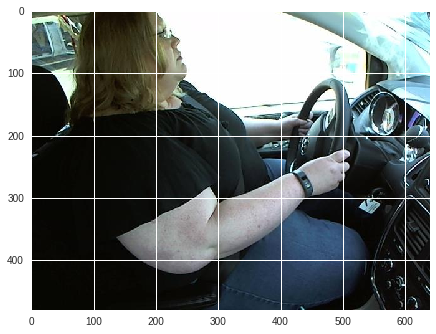

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("Sample/train/0/img_104.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [74]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'Sample'

train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20


def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [76]:
train_features, train_labels = extract_features(train_dir, 200)

Found 200 images belonging to 10 classes.


In [0]:
train_features = np.reshape(train_features, (200, 4 * 4 * 512))

In [78]:

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20)

Epoch 1/30
200/200 [==============================] - 1s 4ms/step - loss: -14.0357 - acc: 0.1050
Epoch 2/30
200/200 [==============================] - 0s 2ms/step - loss: -28.5063 - acc: 0.1000
Epoch 3/30
200/200 [==============================] - 0s 2ms/step - loss: -40.2402 - acc: 0.1000
Epoch 4/30
200/200 [==============================] - 0s 2ms/step - loss: -49.1056 - acc: 0.1000
Epoch 5/30
200/200 [==============================] - 0s 2ms/step - loss: -54.1626 - acc: 0.1000
Epoch 6/30
200/200 [==============================] - 0s 2ms/step - loss: -55.0625 - acc: 0.1000
Epoch 7/30
200/200 [==============================] - 0s 2ms/step - loss: -55.6958 - acc: 0.1000
Epoch 8/30
200/200 [==============================] - 0s 2ms/step - loss: -55.7284 - acc: 0.1000
Epoch 9/30
200/200 [==============================] - 0s 2ms/step - loss: -55.6316 - acc: 0.1000
Epoch 10/30
200/200 [==============================] - 0s 2ms/step - loss: -55.7637 - acc: 0.1000
Epoch 11/30
200/200 [========